## Spotify DataSet

In [128]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [129]:
df = pd.read_csv(r'C:\Users\Mfornaroli\Desktop\spotifyclassification\data.csv', index_col=0)
print(df.shape)
df.head(3)
# df.sort_values('danceability', ascending=False).head(3)

(2017, 16)


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future


In [130]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 267.9+ KB


In [141]:
train, test = train_test_split(df, test_size=0.15)

In [133]:
print(df.shape, train.shape, test.shape)

(2017, 16) (1714, 16) (303, 16)


1    1020
0     997
Name: target, dtype: int64
<class 'pandas.core.series.Series'>


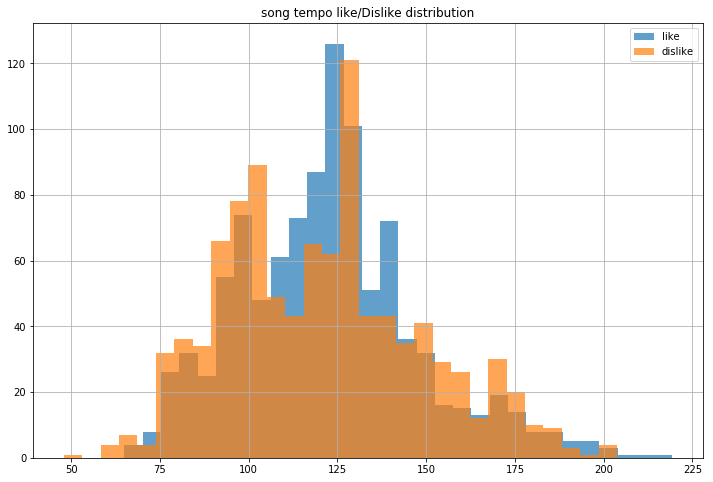

In [134]:
print(df.target.value_counts())
pos_tempo = df[df['target']==1]['tempo']
neg_tempo = df[df['target']==0]['tempo']
print(type(pos_tempo))
fig = plt.figure(figsize=(12,8))
plt.title('song tempo like/Dislike distribution')
pos_tempo.hist(alpha=0.7, bins=30, label='like')
neg_tempo.hist(alpha=0.7, bins=30, label='dislike')
plt.legend(loc='upper right')

1    1020
0     997
Name: target, dtype: int64
<class 'pandas.core.series.Series'>


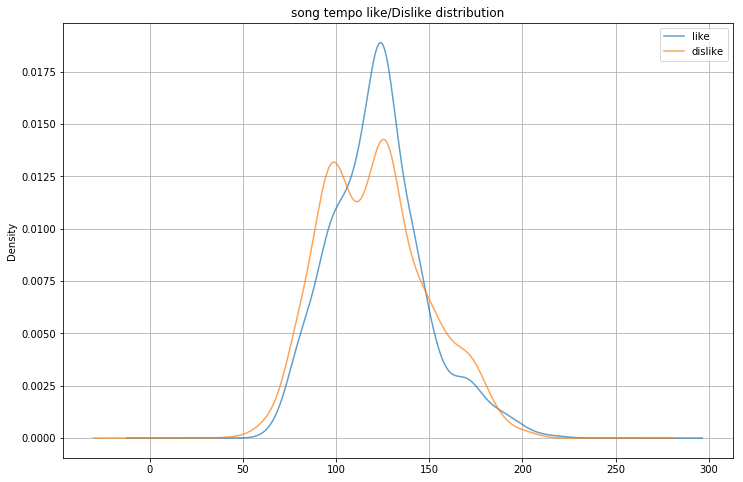

In [135]:
print(df.target.value_counts())
pos_tempo = df[df['target']==1]['tempo']
neg_tempo = df[df['target']==0]['tempo']
print(type(pos_tempo))
fig = plt.figure(figsize=(12,8))
plt.title('song tempo like/Dislike distribution')
pos_tempo.plot.kde(alpha=0.7,  label='like')
neg_tempo.plot.kde(alpha=0.7, label='dislike')
plt.legend(loc='upper right')
plt.grid()

In [136]:
df.columns
columns_EDA = list(df.columns)
columns_EDA
# columns_EDA.remove(['artist', 'song_title', 'target'])
columns_EDA.remove('artist')
columns_EDA.remove('song_title')
columns_EDA.remove('target')
pos_list = []
neg_list = []
for col_name in columns_EDA:
    pos_list.append('pos_' + col_name)
    neg_list.append('neg_' + col_name)
print(pos_list)
print(neg_list)
# creiamo dizionari che contengono i valori delle variabili, splittate in caso
# target = 1 e target = 0. cosi possiamo plottare le distribuzioni
pos_dictionary = {}
neg_dictionary = {}
for i in range(len(columns_EDA)):
    pos_dictionary[pos_list[i]] = df[df['target']==1][columns_EDA[i]]
    neg_dictionary[neg_list[i]] = df[df['target']==0][columns_EDA[i]]
    

['pos_acousticness', 'pos_danceability', 'pos_duration_ms', 'pos_energy', 'pos_instrumentalness', 'pos_key', 'pos_liveness', 'pos_loudness', 'pos_mode', 'pos_speechiness', 'pos_tempo', 'pos_time_signature', 'pos_valence']
['neg_acousticness', 'neg_danceability', 'neg_duration_ms', 'neg_energy', 'neg_instrumentalness', 'neg_key', 'neg_liveness', 'neg_loudness', 'neg_mode', 'neg_speechiness', 'neg_tempo', 'neg_time_signature', 'neg_valence']


<Figure size 432x288 with 0 Axes>

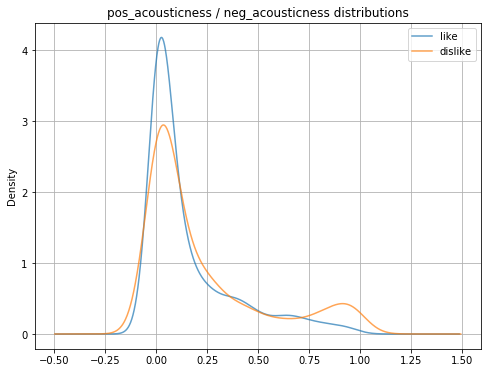

<Figure size 432x288 with 0 Axes>

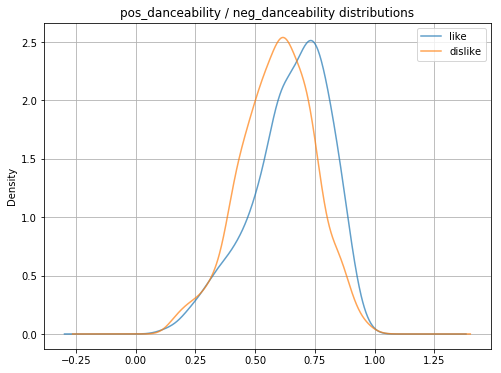

<Figure size 432x288 with 0 Axes>

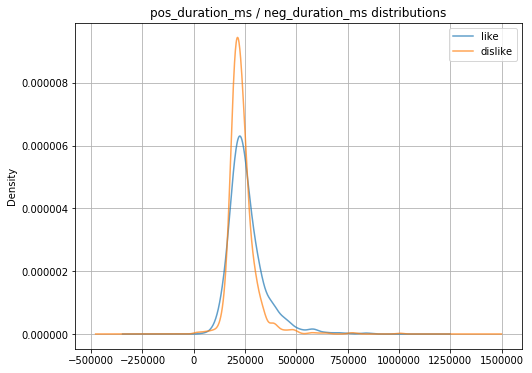

<Figure size 432x288 with 0 Axes>

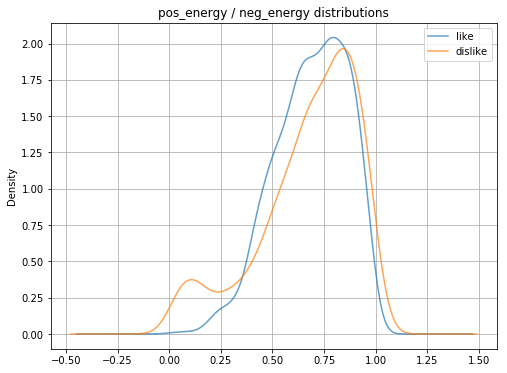

<Figure size 432x288 with 0 Axes>

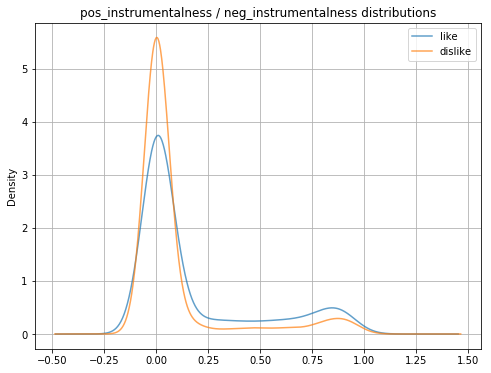

<Figure size 432x288 with 0 Axes>

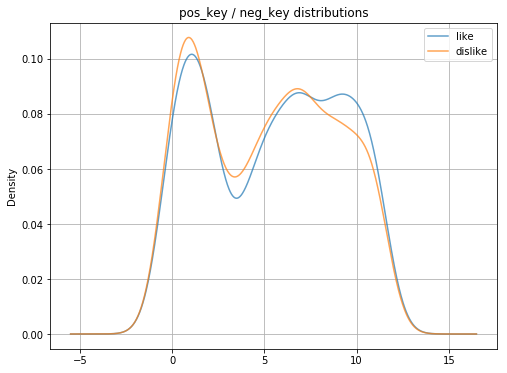

<Figure size 432x288 with 0 Axes>

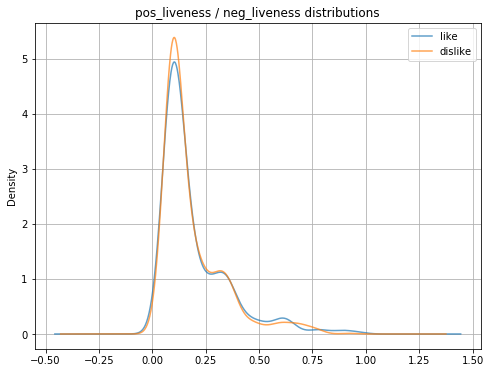

<Figure size 432x288 with 0 Axes>

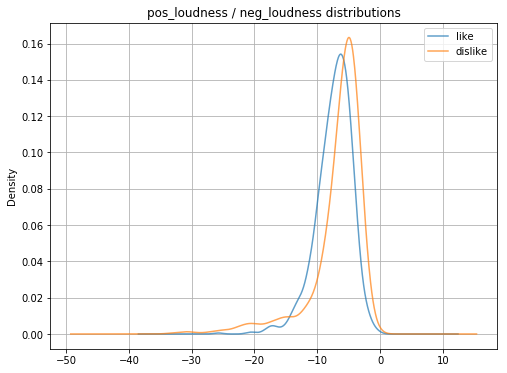

<Figure size 432x288 with 0 Axes>

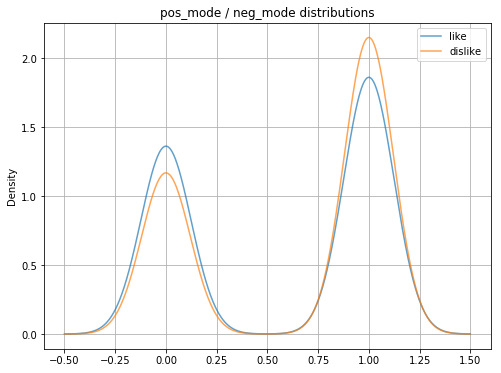

<Figure size 432x288 with 0 Axes>

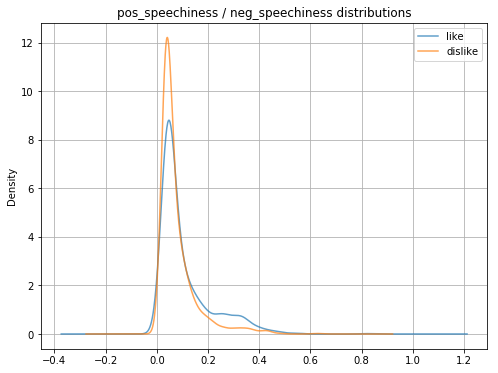

<Figure size 432x288 with 0 Axes>

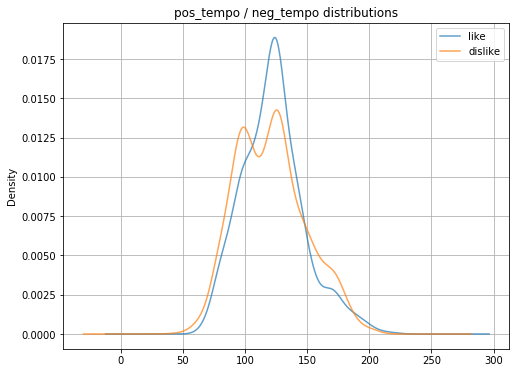

<Figure size 432x288 with 0 Axes>

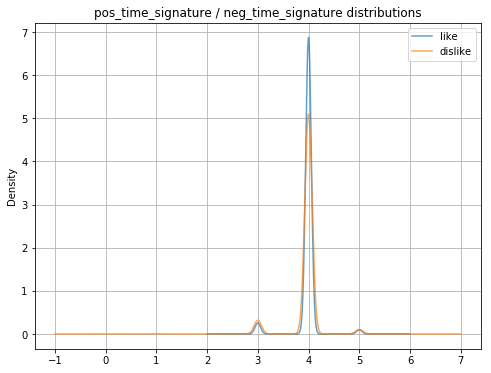

<Figure size 432x288 with 0 Axes>

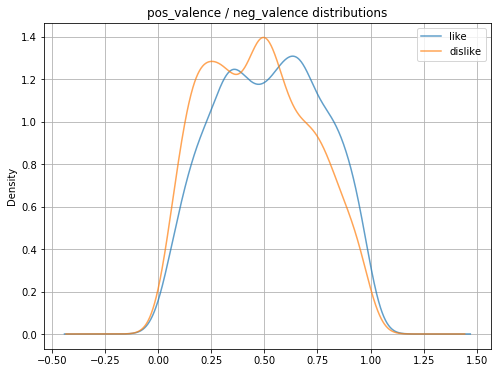

In [137]:
import matplotlib.pyplot as plt
for i in range(len(pos_dictionary)):
    plt.figure()
    fig = plt.figure(figsize=(8,6))
    title = pos_list[i] + ' / ' + neg_list[i] + ' distributions'
    plt.title(title)
    pos_dictionary[pos_list[i]].plot.kde(alpha=0.7,  label='like')
    neg_dictionary[neg_list[i]].plot.kde(alpha=0.7, label='dislike')
    plt.legend(loc='upper right')
    plt.grid()
    # Show/save figure as desired.
    plt.show()

In [183]:
c = DecisionTreeClassifier(min_samples_split=100)
# asking specific questions about the dataset. choosing questions which give the highest information
# gain, based on gini impurity index. adding leaf ( final prediction) when info gain no more possible


In [184]:
train, test = train_test_split(df, test_size=0.15)
x_train = train.drop('target', axis=1)
y_train = train.target
x_train.drop(['song_title', 'artist'], axis=1, inplace=True)
print(x_train.shape)
print(y_train.shape)
x_test = test.drop('target', axis=1)
x_test.drop(['song_title', 'artist'], axis=1, inplace=True)
y_test = test.target
print(x_test.shape)
print(y_test.shape)

(1714, 13)
(1714,)
(303, 13)
(303,)


In [185]:
dt = c.fit(x_train, y_train)

In [186]:
x_train.head(3)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1780,0.201000,0.415,251640,0.661,0.000000,7,0.1430,-4.629,1,0.0296,156.177,4.0,0.283
791,0.000563,0.417,167091,0.730,0.000003,5,0.0766,-6.774,1,0.0363,81.179,4.0,0.440
326,0.016900,0.648,197800,0.862,0.000000,1,0.0937,-4.527,0,0.0777,127.857,4.0,0.176


In [187]:
y_pred = c.predict(x_test)

In [188]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,

In [189]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [190]:
print('accuracy with decision tree: ', score)

accuracy with decision tree:  0.693069306930693


In [166]:
df.target.value_counts()

1    1020
0     997
Name: target, dtype: int64